In [1]:
import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Load Functions 

In [2]:
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def abs_cos_vector1(v1, v2):
    return abs(dotproduct(v1, v2) / length(v2))

def calc_force(df):
    df['force'] = df['Fx']**2 + df['Fy']**2 + df['Fz']**2
    df['force'] = df['force'].pow(1/2)
    return df

def calc_velocity(df):
    df['velocity'] = df['Lx']**2 + df['Ly']**2 + df['Lz']
    df['velocity'] = df['velocity'].pow(1/2)
    return df
    
def calc_score(df, factor=2):
    df['score'] = df['front']*df['velocity']/factor
    return df

def time_to_sec(time):
    tmp = time.split(':')
    mins = tmp[0]
    secs = tmp[1]
    return timedelta(minutes=int(mins), seconds=int(secs)).total_seconds()

# Diagram 6.2: average score in the first day 
## (ordered by uid and strength of force)

In [9]:
data_dir = '../data/old_data/1_tag/'
filenames = os.listdir(data_dir)
df = pd.DataFrame()
for filename in filenames:
    data_path = data_dir + filename
    df_tmp = pd.read_csv(data_path)
    
    p_uid = '(^heika)(\d*)'
    result = re.match(p_uid, filename)
    uid = result.groups()[1]

#################### delete outliner ############################
    df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
#     if df_tmp['Fx.1'].sum()>0:
#         continue
#     if df_tmp['Fy.1'].sum()>0:
#         continue
#     if df_tmp['Fz.1'].sum()>0:
#         continue
#     df_tmp = df_tmp[df_tmp['Fx.1']<=0]
#     df_tmp = df_tmp[df_tmp['Fy.1']<=0]
#     df_tmp = df_tmp[df_tmp['Fz.1']<=0]

############# calc length of vector force ########################
    df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
    df_tmp['force'] = df_tmp['force'].pow(1/2)
#     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
#     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)

############# calc force projection on velocity ###############
#     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
#     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
#     score = []
#     for i in xrange(len(df_tmp)):
#         score.append(np.dot(force_3d[i], velocity_3d[i]))
#     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']
        
    
#############  calc length of vector velocity  ####################
    df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
    df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)
    
############# method 2 ##########################################
    force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    len_force = []
    len_velocity = []
    cos_force = []
    for i in xrange(len(df_tmp)):
        len_force.append(np.sqrt(force_3d[i].dot(force_3d[i])))
        len_velocity.append(np.sqrt(velocity_3d[i].dot(velocity_3d[i])))
        cos_force.append(abs_cos_vector1(force_3d[i], velocity_3d[i]))
        
    df_tmp['len_force'] = pd.Series(len_force)
    df_tmp['len_velocity'] = pd.Series(len_velocity)
    df_tmp['cos_force'] = pd.Series(cos_force)

    
############# calc score   ###################################
#     df_tmp['score'] = pd.Series(score)
    df_tmp['score'] = df_tmp['front']*df_tmp['velocity']
    df_tmp['score2'] = df_tmp['front']*df_tmp['len_velocity']
    

#############################################################################
    df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                  'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)

    
    df_tmp = df_tmp[['force', 'score', 'len_force', 'score2', 'cos_force']]
    df_curr = pd.DataFrame([0])
    df_curr['avg_force'] = df_tmp[df_tmp['force']>0]['force'].mean()
    df_curr['score'] = df_tmp['score'].sum()
    df_curr['avg_len_force'] = df_tmp[df_tmp['len_force']>0]['len_force'].mean()
    df_curr['score2'] = df_tmp['score2'].sum()
    df_curr['cos_force'] = df_tmp[df_tmp['cos_force']>0]['cos_force'].mean()
    df_curr['uid'] = uid
    df_curr = df_curr.drop([0], axis=1)
    df = pd.concat([df, df_curr])
    
df_nnp = df.dropna() 
print(df_nnp.head(10))
df.head(10)


/home/xwang/anaconda3/envs/uvebl/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


   avg_force       score  avg_len_force      score2  cos_force  uid
0  20.264949   25.874380      20.264949   25.874380  14.856511  007
0  20.382334   53.840158      20.382334   53.840158  16.918819  005
0  57.421782  128.847168      57.421782  128.847168  29.684472  006
0  31.093186   69.594640      31.093186   69.594640  19.709157  005
0  42.477311  127.088474      42.477311  127.088474  21.008214  005
0  37.677265   64.650468      37.677265   64.650468  12.657265  010
0  54.051348   99.760647      54.051348   99.760647  18.112016  008
0  10.934365   77.710361      10.934365   77.710361   7.676563  003
0  38.653393   59.471393      38.653393   59.471393  25.249669  007
0  37.426485  109.275403      37.426485  109.275403  19.350054  008


,avg_force,score,avg_len_force,score2,cos_force,uid
0,NaN,0.000000,NaN,0.000000,NaN,008
0,20.264949,25.874380,20.264949,25.874380,14.856511,007
0,20.382334,53.840158,20.382334,53.840158,16.918819,005
0,57.421782,128.847168,57.421782,128.847168,29.684472,006
0,NaN,0.000000,NaN,0.000000,NaN,011
0,31.093186,69.594640,31.093186,69.594640,19.709157,005
0,42.477311,127.088474,42.477311,127.088474,21.008214,005
0,37.677265,64.650468,37.677265,64.650468,12.657265,010
0,54.051348,99.760647,54.051348,99.760647,18.112016,008
0,10.934365,77.710361,10.934365,77.710361,7.676563,003


In [10]:
df_tmp = df.groupby(['uid']).mean()
df_tmp = df_tmp.drop(['avg_len_force', 'score2'], axis=1)
df_tmp = df_tmp.reset_index(drop=False)
df_tmp = df_tmp.sort_values('avg_force')
df_tmp['avg_force'] = df_tmp['avg_force'].apply(lambda x: round(x, 2))
df_tmp['cos_force'] = df_tmp['cos_force'].apply(lambda x: round(x, 2))
df_tmp['x_axis'] = df_tmp['avg_force'].astype('str')
df_tmp['x_axis2'] = df_tmp['cos_force'].astype('str')
df_tmp['x_axis'] = df_tmp['uid'] + '('+ df_tmp['x_axis']+')' 
df_tmp['x_axis2'] = df_tmp['uid'] + '('+ df_tmp['x_axis2']+')' 
df_tmp['score'] = df_tmp['score']/2
df_tmp

,uid,avg_force,score,cos_force,x_axis,x_axis2
6,007,36.41,30.633798,22.63,007(36.41),007(22.63)
0,001,36.98,43.814827,17.87,001(36.98),001(17.87)
4,005,41.02,51.766548,22.04,005(41.02),005(22.04)
3,004,42.23,62.672275,26.75,004(42.23),004(26.75)
1,002,44.52,36.576576,20.44,002(44.52),002(20.44)
9,011,45.49,42.907512,27.37,011(45.49),011(27.37)
7,008,46.57,40.850243,22.84,008(46.57),008(22.84)
8,010,46.71,30.275531,14.26,010(46.71),010(14.26)
5,006,59.20,117.103007,29.66,006(59.2),006(29.66)
2,003,67.64,43.735846,32.96,003(67.64),003(32.96)


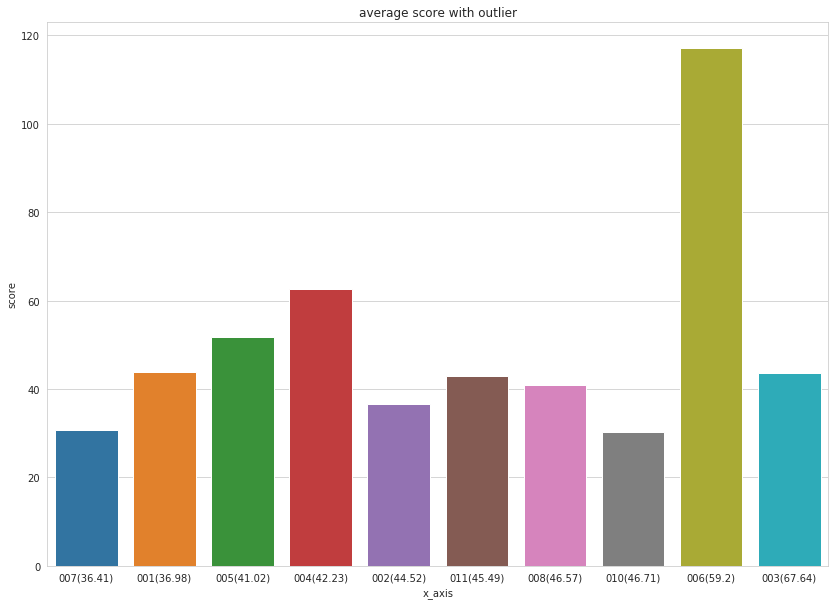

In [11]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score with outlier')

## with the same order, that in Oliver's experiment

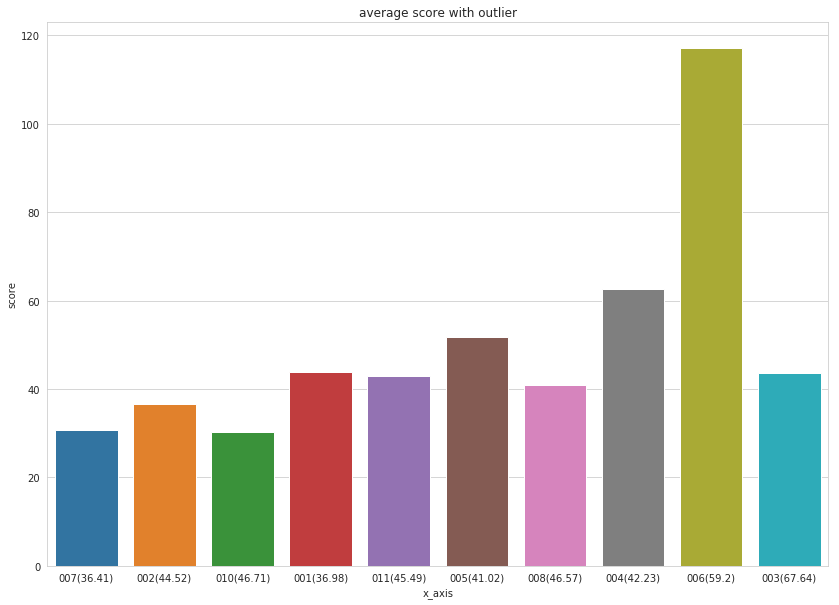

In [12]:
df_tmp = df_tmp.reindex([6,1,8,0,9,4,7,3,5,2])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score with outlier')

In [13]:
df_tmp = df_nnp.groupby(['uid']).mean()
df_tmp = df_tmp.drop(['avg_len_force', 'score2'], axis=1)
df_tmp = df_tmp.reset_index(drop=False)
df_tmp = df_tmp.sort_values('avg_force')
df_tmp['avg_force'] = df_tmp['avg_force'].apply(lambda x: round(x, 2))
df_tmp['cos_force'] = df_tmp['cos_force'].apply(lambda x: round(x, 2))
df_tmp['x_axis'] = df_tmp['avg_force'].astype('str')
df_tmp['x_axis2'] = df_tmp['cos_force'].astype('str')
df_tmp['x_axis'] = df_tmp['uid'] + '('+ df_tmp['x_axis']+')' 
df_tmp['x_axis2'] = df_tmp['uid'] + '('+ df_tmp['x_axis2']+')' 
df_tmp['score'] = df_tmp['score']/2
df_tmp

,uid,avg_force,score,cos_force,x_axis,x_axis2
6,007,36.41,30.633798,22.63,007(36.41),007(22.63)
0,001,36.98,43.814827,17.87,001(36.98),001(17.87)
4,005,41.02,51.766548,22.04,005(41.02),005(22.04)
3,004,42.23,62.672275,26.75,004(42.23),004(26.75)
1,002,44.52,36.576576,20.44,002(44.52),002(20.44)
9,011,45.49,69.724708,27.37,011(45.49),011(27.37)
7,008,46.57,56.736449,22.84,008(46.57),008(22.84)
8,010,46.71,35.618272,14.26,010(46.71),010(14.26)
5,006,59.20,117.103007,29.66,006(59.2),006(29.66)
2,003,67.64,65.603769,32.96,003(67.64),003(32.96)


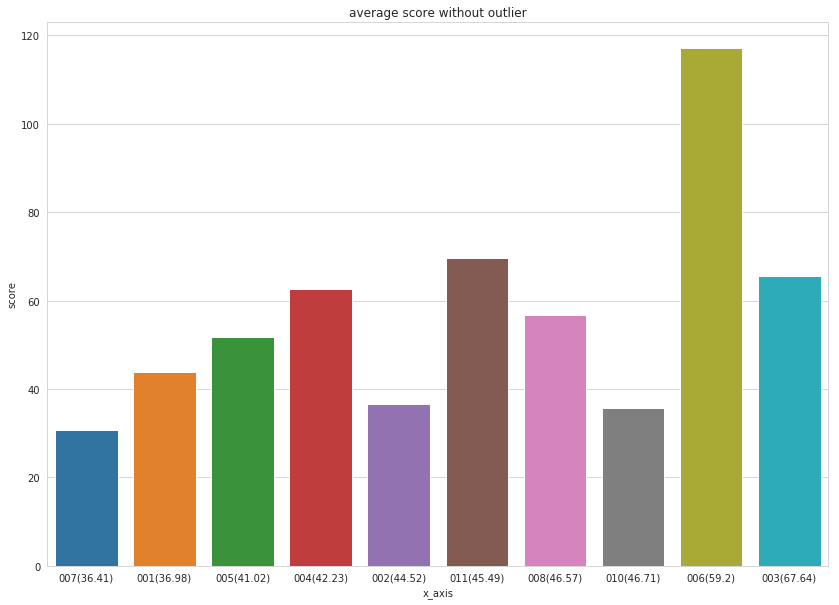

In [14]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score without outlier')

## with the same order, that in Oliver's experiment

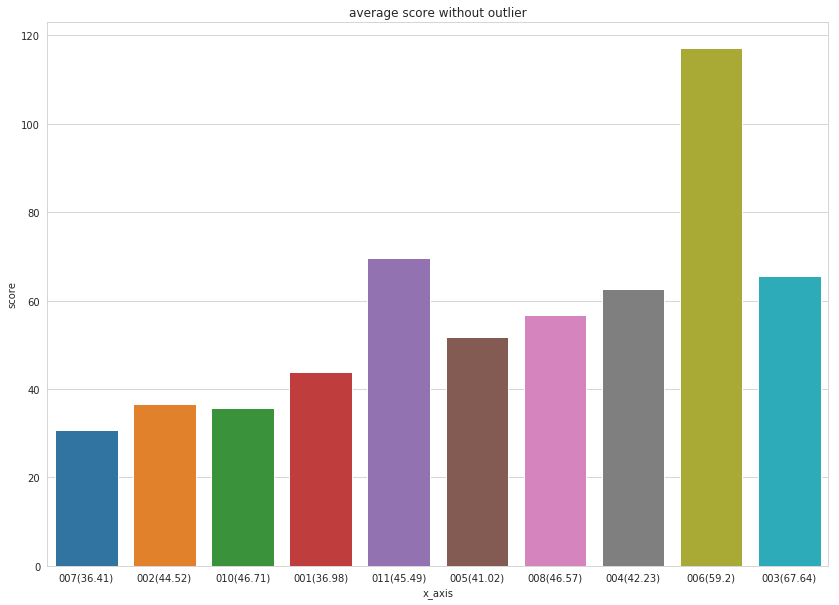

In [15]:
df_tmp = df_tmp.reindex([6,1,8,0,9,4,7,3,5,2])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", data=df_tmp,ci=0).set_title('average score without outlier')

# Diagram 6.3 Performance improvement throughout the training session week 

In [16]:
days = ['1_tag/', '2_tag/', '3_tag/', '4_tag/', '5_tag/']
df = pd.DataFrame()
for i, day in enumerate(days):
    data_dir = '../data/old_data/'+day
    filenames = os.listdir(data_dir)
    
    for filename in filenames:
        data_path = data_dir + filename
        df_tmp = pd.read_csv(data_path)
        df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
        if len(df_tmp)==0:
            df_tmp = pd.concat([df_tmp, df[0:1]])
            df_tmp[0:1] = np.nan


        p = '(^heika)(\d*)(\_)(d)(\d)(\_)(e)(\d*)(\_)(\d)'
        result = re.match(p, filename)
        uid = result.groups()[1]
        d = result.groups()[4]
        exc_num = result.groups()[7]
        exc_times = result.groups()[9]
        
        df_tmp['day'] = d
        df_tmp['exc_num'] = exc_num
        df_tmp['exc_times'] = exc_times
        df_tmp['uid'] = uid
        
#         df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     #     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
#         df_tmp['force'] = df_tmp['force'].pow(1/2)
    #     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
    #     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)



    ############# calc force projection on velocity ###############
    #     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    #     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    #     score = []
    #     for i in xrange(len(df_tmp)):
    #         score.append(np.dot(force_3d[i], velocity_3d[i]))
    #     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']


    #############  calc length of vector velocity  ####################
#         df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
#         df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)


    ############# calc score   ###################################
    #     df_tmp['score'] = pd.Series(score)
#         df_tmp['score'] = df_tmp['front']*df_tmp['velocity']


    #############################################################################
#         df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
#                       'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
        
        df = pd.concat([df, df_tmp])
        
        
df.to_csv('../data/all_data.csv', index=False)
#"""
#df = pd.read_csv('../data/all_data.csv')

/home/xwang/anaconda3/envs/uvebl/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]
/home/xwang/anaconda3/envs/uvebl/lib/python3.6/site-packages/ipykernel_launcher.py:60: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



KeyboardInterrupt: 

In [11]:
print(df.columns)
df.info()

Index([u'Ax', u'Ay', u'Az', u'Fx', u'Fx.1', u'Fy', u'Fy.1', u'Fz', u'Fz.1',
       u'Lx', u'Ly', u'Lz', u'Mx', u'Mx.1', u'My', u'My.1', u'Mz', u'Mz.1',
       u'day', u'exc_num', u'exc_times', u'front', u'left', u'right', u'uid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4007269 entries, 0 to 2655
Data columns (total 25 columns):
Ax           float64
Ay           float64
Az           float64
Fx           float64
Fx.1         float64
Fy           float64
Fy.1         float64
Fz           float64
Fz.1         float64
Lx           float64
Ly           float64
Lz           float64
Mx           float64
Mx.1         float64
My           float64
My.1         float64
Mz           float64
Mz.1         float64
day          object
exc_num      object
exc_times    object
front        float64
left         float64
right        float64
uid          object
dtypes: float64(21), object(4)
memory usage: 794.9+ MB


In [12]:
df = calc_force(df)
df = calc_velocity(df)
df = calc_score(df)
df = df.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_nnp = df.dropna()

In [13]:
df_6_3 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3 = df_6_3.reset_index()
df_6_3_nnp = df_6_3_nnp.reset_index()
# df_6_3 = df_6_3[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3_nnp = df_6_3_nnp[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3 = df_6_3.reset_index()
# df_6_3_nnp = df_6_3_nnp.reset_index()

first_attempt = df_6_3.groupby(['uid', 'exc_num']).head(1)
first_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_3.groupby(['uid','exc_num']).tail(1)
last_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = df_6_3.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition_nnp = df_6_3_nnp.merge(first_attempt_nnp, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition_nnp = last_repetition_nnp.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition_nnp = last_repetition_nnp.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition.columns = ['day', 'exc_num', 'uid', 'score']
last_repetition_nnp.columns = ['day', 'exc_num', 'uid', 'score']

first_attempt = first_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = last_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = last_repetition[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()
last_repetition_nnp = last_repetition_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition_nnp = last_repetition_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt'
last_repetition_nnp['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'score']
df_6_3 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_3_nnp = pd.concat([first_attempt_nnp[cols], last_repetition_nnp[cols], last_attempt_nnp[cols]])
df_6_3_nnp

,exc_num,level,score
0,1,first attempt,150.878563
1,10,first attempt,851.222979
2,11,first attempt,257.006258
3,2,first attempt,267.847724
4,3,first attempt,91.160234
5,4,first attempt,204.993678
6,5,first attempt,320.033587
7,6,first attempt,184.396319
8,7,first attempt,77.214086
9,8,first attempt,493.547575


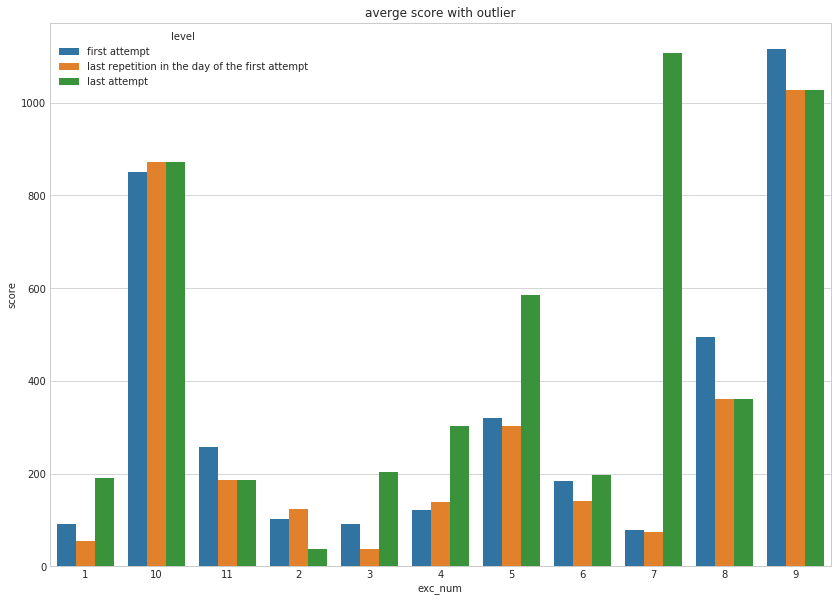

In [14]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3,ci=0).set_title('averge score with outlier')

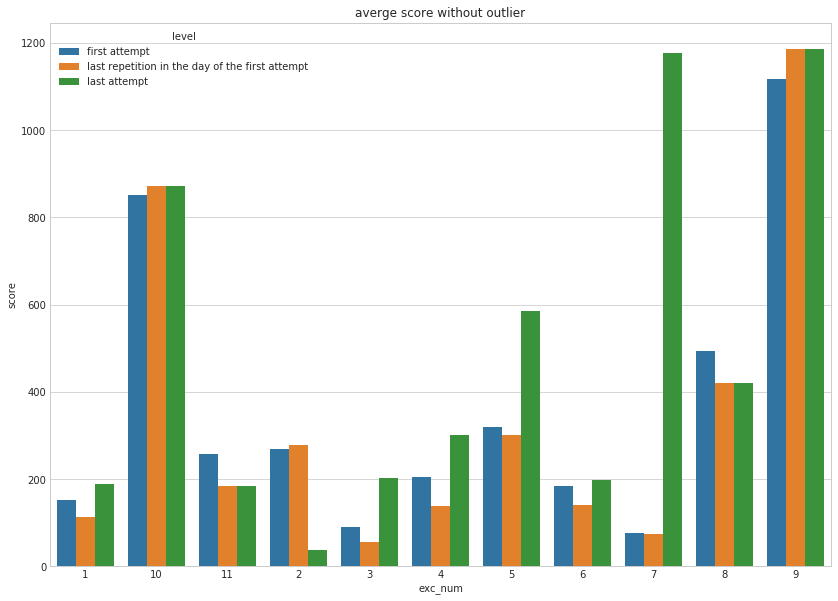

In [15]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3_nnp,ci=0).set_title('averge score without outlier')

# Diagram 6.4 Whisker box 

In [16]:
df_6_4 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4 = df_6_4.reset_index()
df_6_4_nnp = df_6_4_nnp.reset_index()

first_attempt = df_6_4.groupby(['exc_num', 'uid']).head(1)
first_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_4.groupby(['exc_num', 'uid']).tail(1)
last_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt'

cols = ['uid', 'day', 'exc_num', 'level', 'score']
df_6_4 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_4_nnp = pd.concat([first_attempt_nnp[cols], last_attempt_nnp[cols]])

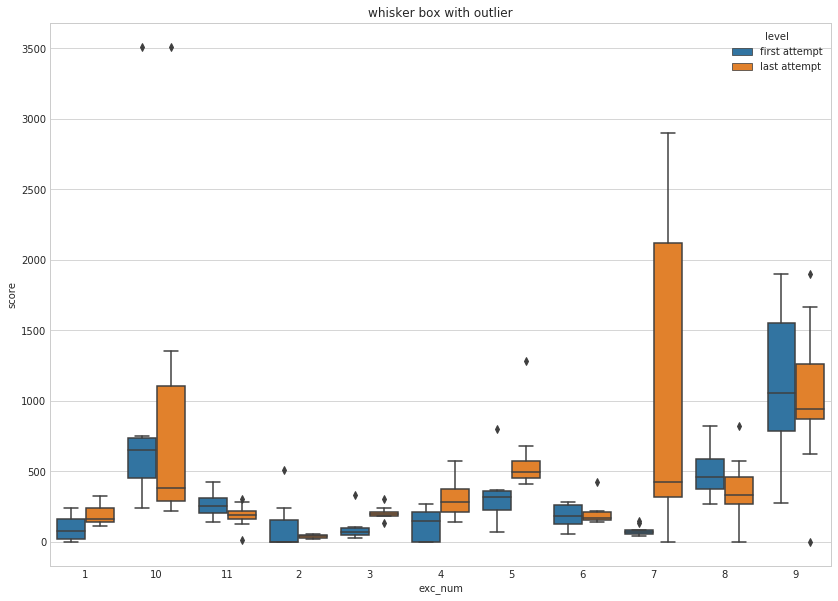

In [17]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level', data=df_6_4).set_title('whisker box with outlier')

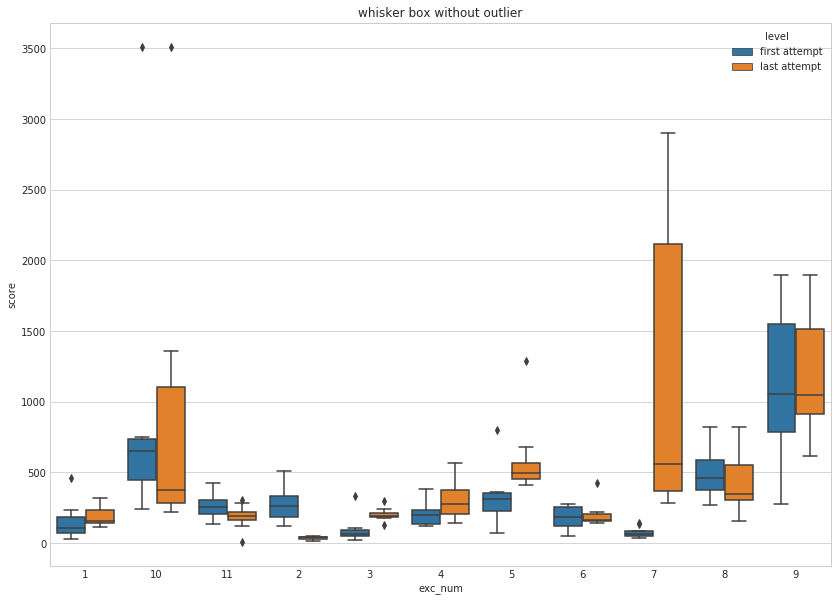

In [18]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level', data=df_6_4_nnp).set_title('whisker box without outlier')

# Diagram 6.5 Timing Measurements

In [17]:
"""
dir = '../data/'
filenames = ['tag 1', 'tag 2', 'tag 3', 'tag 4', 'tag 5']
# init 
exc_content = {}
is_part = False
b_get_csv = False
df = pd.DataFrame([], columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])

for filename in filenames:
    filename = dir+filename
    with open(filename, 'r') as f:
        for line in f:
            b_get_csv = False
            if line.startswith('tag'):
                p_day = '(^tag )(\d+)'
                result = re.match(p_day, line)
                day = result.groups()[1]
                week = None
                uid = None
                start_time = None
                
            elif line.startswith('HEiKA'):
                p_uid = '(^HEiKA)(\d*)'
                result = re.match(p_uid, line)
                uid = result.groups()[1]
            elif line.startswith('start_time'):
                p_start_time = '(^start_time: )(.*)'
                result = re.match(p_start_time, line)
                start_time = result.groups()[1]
  
            elif line.startswith('e'):
                p_exc = '(^e)(\d*)(.)(.*)'
                result = re.match(p_exc, line)
                char = result.groups()[2]
                num = result.groups()[1]
                if char == ':':
                    content = result.groups()[3][1:]
                    exc_content[num] = content

                elif char == ' ':
                    b_get_csv = True
                    exc_num = num
                    infos = result.groups()[3].split(' ')
                    if infos[1].startswith('part'):
                        is_part = True
                        exc_times = infos[0][1:]
                        part_num = infos[1][-2]
                        s_time = time_to_sec(infos[2])
                        e_time = time_to_sec(infos[4])

                    else:
                        is_part = False
                        exc_times = infos[0][1:-1]
                        s_time = time_to_sec(infos[1])
                        e_time = time_to_sec(infos[3])
                        
            if b_get_csv:
                row = [uid, day, exc_num, exc_times, e_time-s_time]
                df_tmp = pd.DataFrame(np.array(row).reshape(1,-1),columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])
                df = pd.concat([df, df_tmp], axis=0)
                
df.to_csv('../data/running_time.csv', index=False)
#"""
df = pd.read_csv('../data/running_time.csv')


In [18]:
df_6_5 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_5 = df_6_5.reset_index()

first_attempt = df_6_5.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_5.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_5.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt = first_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()

last_attempt = last_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()

last_repetition = last_repetition[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'running_time']
df_6_5 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_5

,exc_num,level,running_time
0,1,first attempt,76.666667
1,2,first attempt,112.111111
2,3,first attempt,55.500000
3,4,first attempt,73.200000
4,5,first attempt,134.200000
5,6,first attempt,83.000000
6,7,first attempt,48.900000
7,8,first attempt,107.800000
8,9,first attempt,118.900000
9,10,first attempt,127.100000


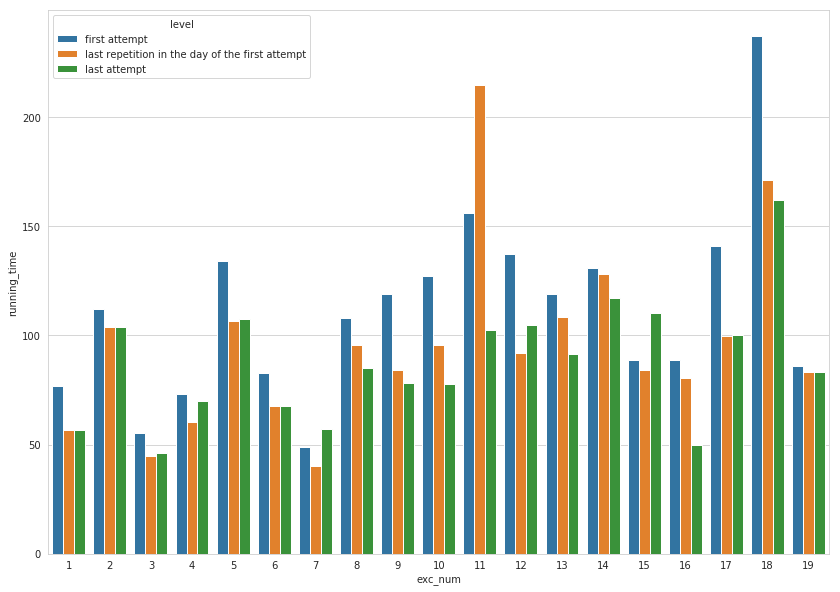

In [19]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_6_5,ci=0)

# Diagram 6.6 Whisker box 

In [20]:
df_6_6 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_6 = df_6_6.reset_index()

first_attempt = df_6_6.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_6.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_6.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['uid', 'exc_num', 'level', 'running_time']
df_6_6 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_6

,uid,exc_num,level,running_time
0,1,1,first attempt,108.0
1,1,2,first attempt,84.0
2,1,3,first attempt,59.0
3,1,4,first attempt,83.0
4,1,5,first attempt,139.0
5,1,6,first attempt,111.0
6,1,7,first attempt,64.0
7,1,8,first attempt,94.0
8,1,9,first attempt,111.0
9,1,10,first attempt,122.0


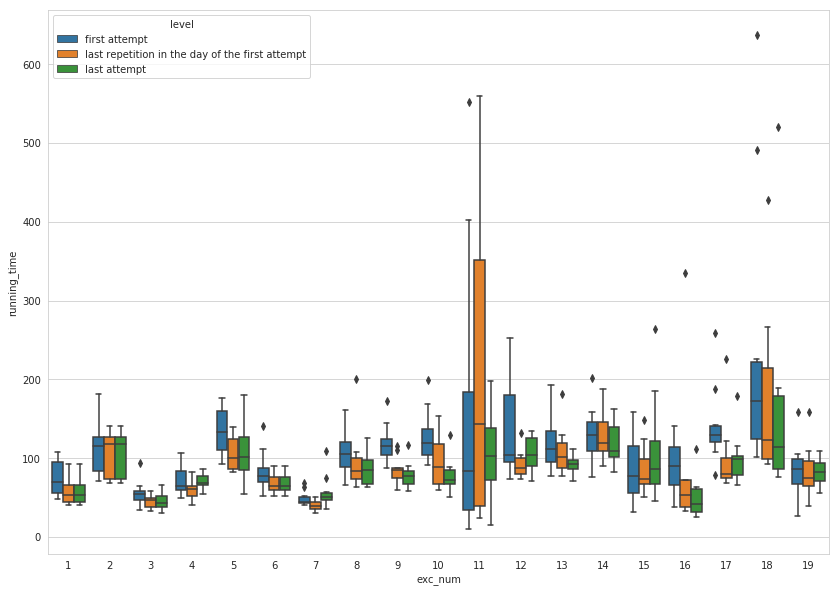

In [21]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

# Diagram 6.7 Correlation between score and time

In [26]:
df_score = pd.read_csv('../data/all_data.csv')
df_score = calc_force(df_score)
df_score = calc_velocity(df_score)
df_score = calc_score(df_score)
df_score = df_score.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_score_nnp = df_score.dropna()

df_score = df_score[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score_nnp = df_score_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score = df_score.reset_index()
df_score_nnp = df_score_nnp.reset_index() 
df_score
df_time = pd.read_csv('../data/running_time.csv')
df_time = df_time.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_time = df_time.reset_index()

df_6_7 = df_time.merge(df_score, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7 = df_6_7[['uid', 'running_time', 'score']]
df_6_7_nnp = df_time.merge(df_score_nnp, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7_nnp = df_6_7_nnp[['uid', 'running_time', 'score']]
df_6_7_nnp.head()

,uid,running_time,score
0,1,108.0,110.577998
1,1,78.0,71.797143
2,1,72.0,65.660763
3,1,59.0,30.229030
4,1,49.0,25.616438


In [27]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# g  = sns.jointplot(x="running_time", y="score", data=df_6_7, kind="reg")
g = sns.JointGrid(x="running_time", y="score", data=df_6_7, height=10)
g = g.plot(sns.regplot, sns.distplot)

TypeError: __init__() got an unexpected keyword argument 'height'

In [ ]:
g = sns.JointGrid(x="running_time", y="score", data=df_6_7_nnp, height=10)
g = g.plot(sns.regplot, sns.distplot)